In [1]:
import qiskit
qiskit.__version__

'2.0.1'

In [2]:
from qiskit import *

In [3]:
Qr = QuantumRegister(1, 'q') # Registrando 1 bit quântico no meu Circuito

Cr = ClassicalRegister(1, 'c') # Registrando 1 bit clássico no meu Circuito

circuit = QuantumCircuit(Qr, Cr) #criando o circuito
circuit.reset(Qr[0]) #resetar esse qubit

%matplotlib inline 
#premite plotar gráficos neste notebook
circuit.draw()

q: ─|0>─
          
c: 1/═════

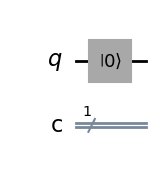

In [4]:
circuit.draw(output = 'mpl')

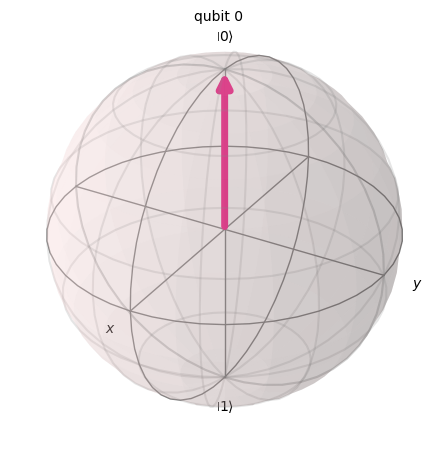

In [5]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

state = Statevector(circuit)
plot_bloch_multivector(state)

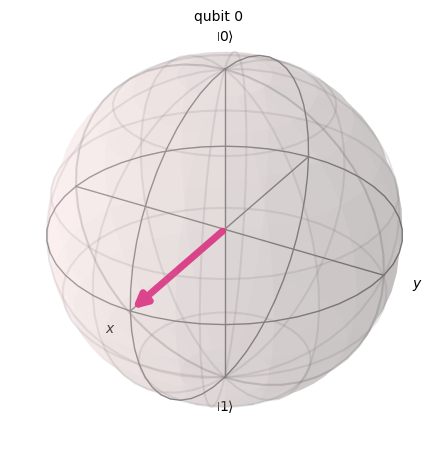

In [6]:
circuit.h(Qr[0])
circuit.draw(output = 'mpl')
state = Statevector(circuit)
plot_bloch_multivector(state)

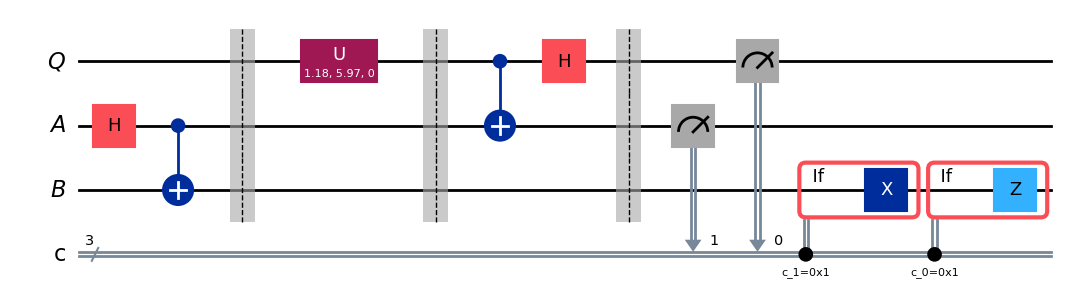

In [8]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import random
import numpy as np
from numpy import pi

secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")

cr = ClassicalRegister(3, 'c')

qc = QuantumCircuit(secret, Alice, Bob, cr)


qc.h(Alice)
qc.cx(Alice,Bob)

qc.barrier()

np.random.seed(42) 
theta = np.random.uniform(0.0, 1.0) * np.pi    
varphi = np.random.uniform(0.0, 2.0) * np.pi    


qc.u(theta, varphi, 0.0, secret)
qc.barrier()

qc.cx(secret,Alice)
qc.h(secret)
qc.barrier()


qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])

with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):   
    qc.z(Bob)

qc.draw(output="mpl")

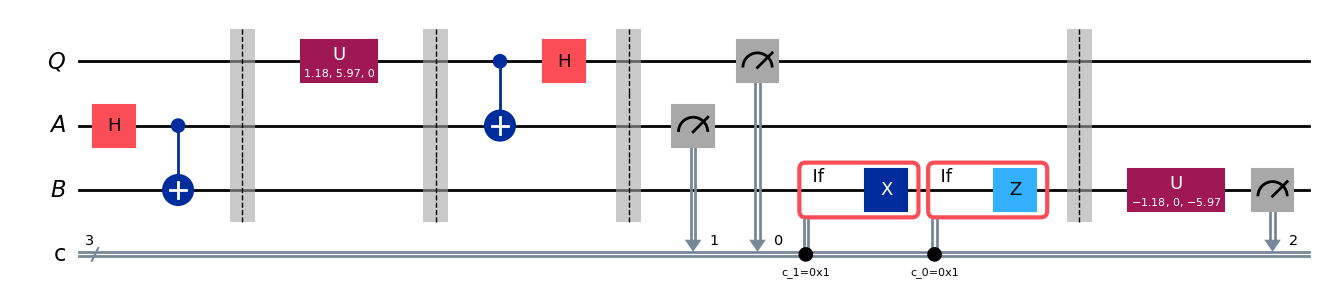

In [9]:
qc.barrier()

qc.u(theta, varphi, 0.0, Bob).inverse()   
qc.measure(Bob, cr[2]) 

qc.draw(output="mpl")

Resultados da simulação:


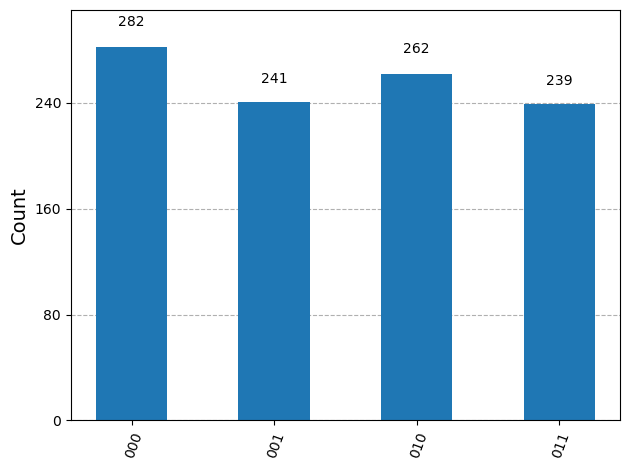

In [10]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Criar simulador local
simulator = AerSimulator()

# Transpila circuito para o simulador
qc_t = transpile(qc, simulator)

# Executar circuito no simulador com 1024 shots
job = simulator.run(qc_t, shots=1024)

# Obter resultados
result = job.result()
counts = result.get_counts()

# Mostrar resultados
print("Resultados da simulação:")
plot_histogram(counts)
